# Evaluation Project 6 Loan Application Status Prediction

Importing require library for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

importing dataset

In [2]:

df=pd.read_csv('LoanPredictions.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
print('No of Rows:',df.shape[0])

No of Rows: 614


In [5]:
print('No. of Columns:',df.shape[1])
df.head()

No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis
Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Data Integrity Check

In [11]:
df.duplicated().sum()

0

### Missing value check

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

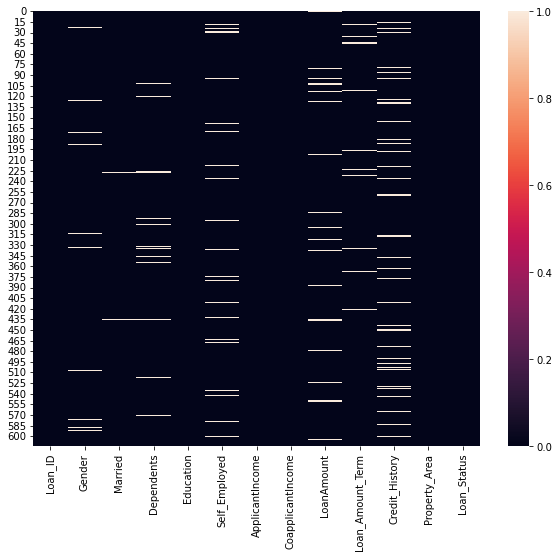

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


<b>Start with Enlisting Value counts & Sub-categories of different categorial features available<b>

In [16]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('*'*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
****************************************************************************************************
Married
Yes    398
No     213
Name: Married, dtype: int64
****************************************************************************************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************************************************************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************************************************************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************************************************************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0     

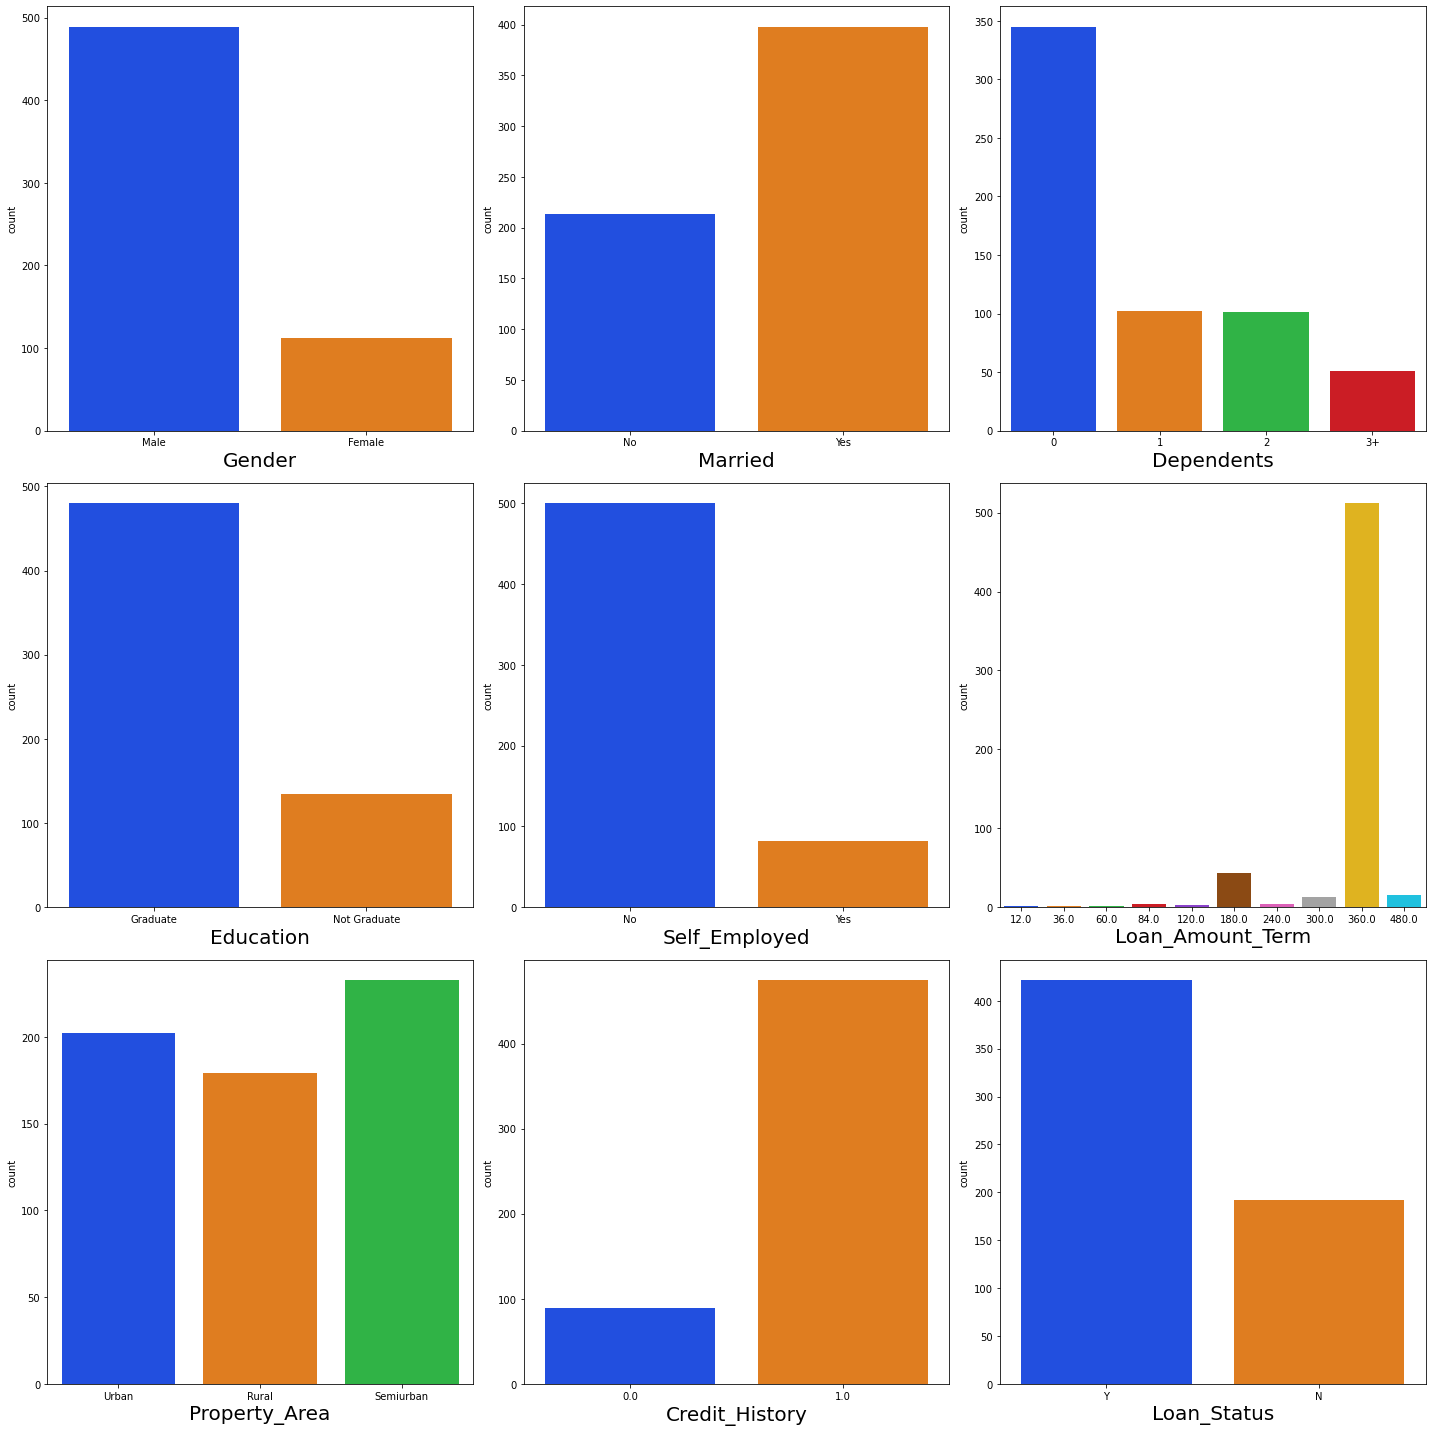

In [18]:
sns.set_palette('bright')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b>Let check outliers for missing values Numerical variable having missing values by plotting boxplot.<b>

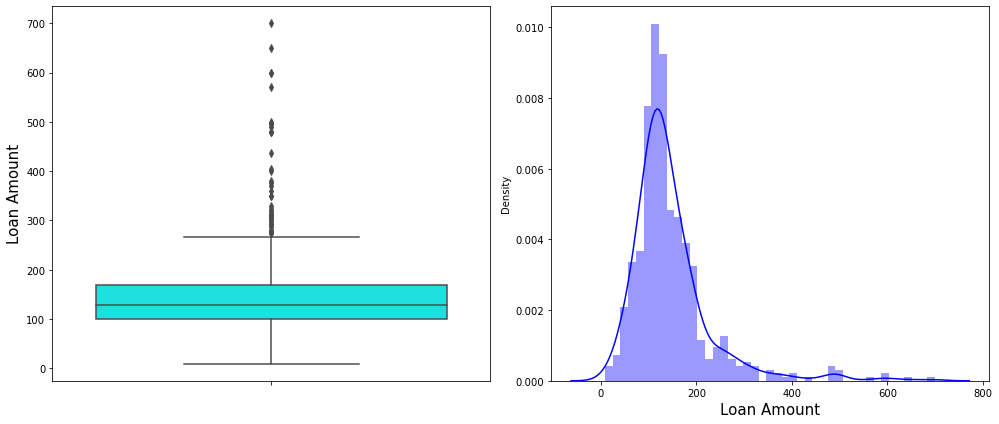

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


### Imputation of Missing values

In [22]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Missing Value Check After Imputation

In [23]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


# Statistical Matrix

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

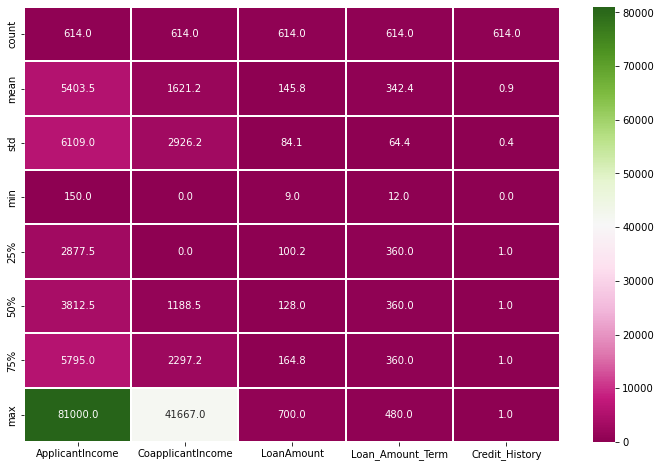

In [25]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

# Target Variable

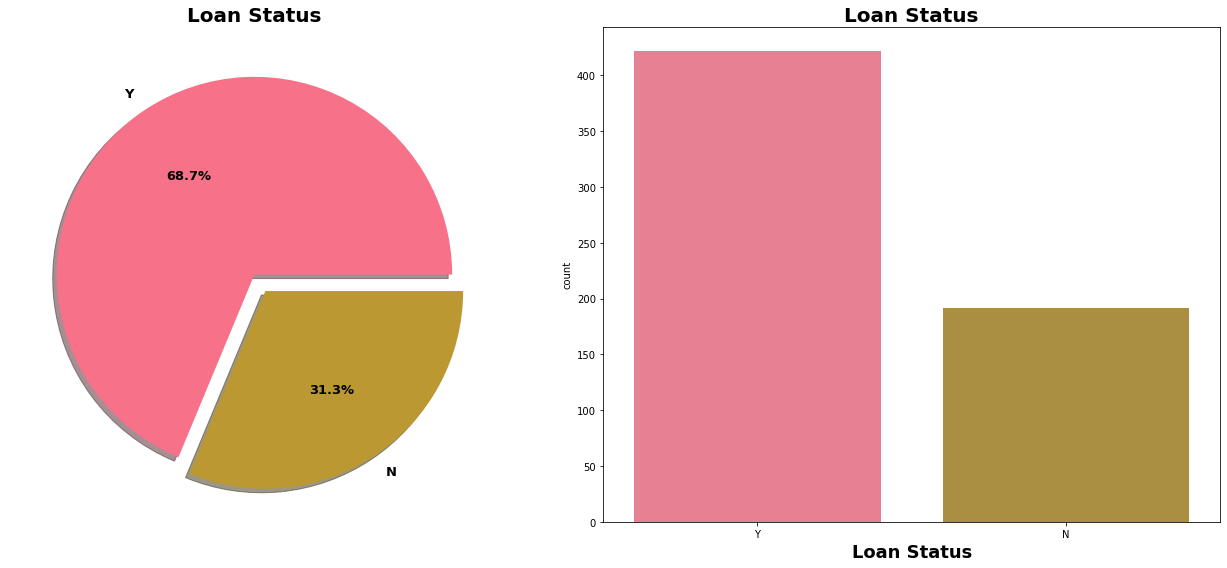

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

In [27]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


# Married Vs Loan Status

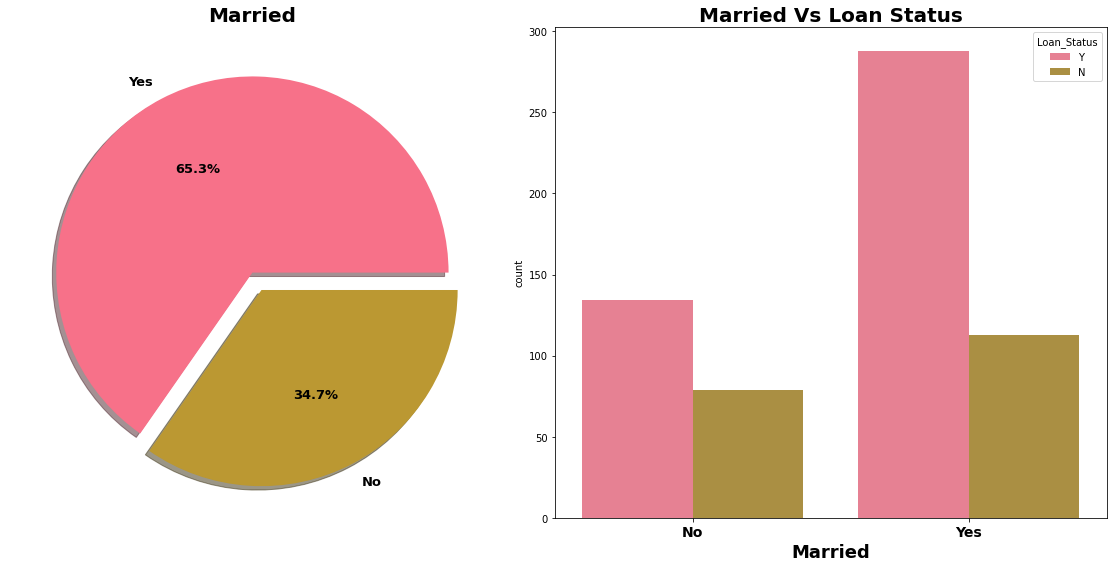

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [29]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

# number dependents play

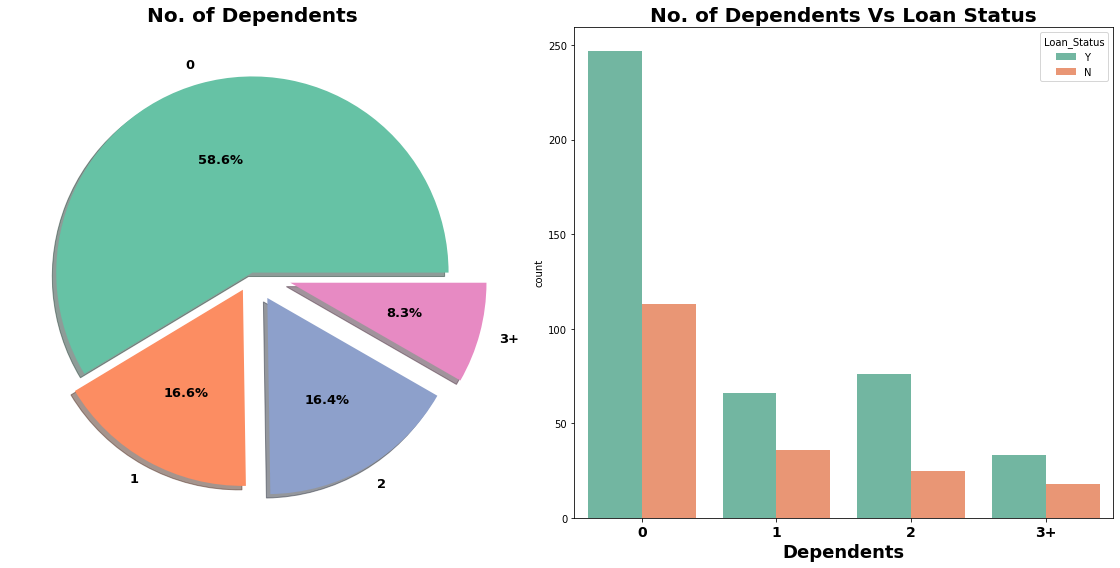

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [31]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [32]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Education Vs Loan status

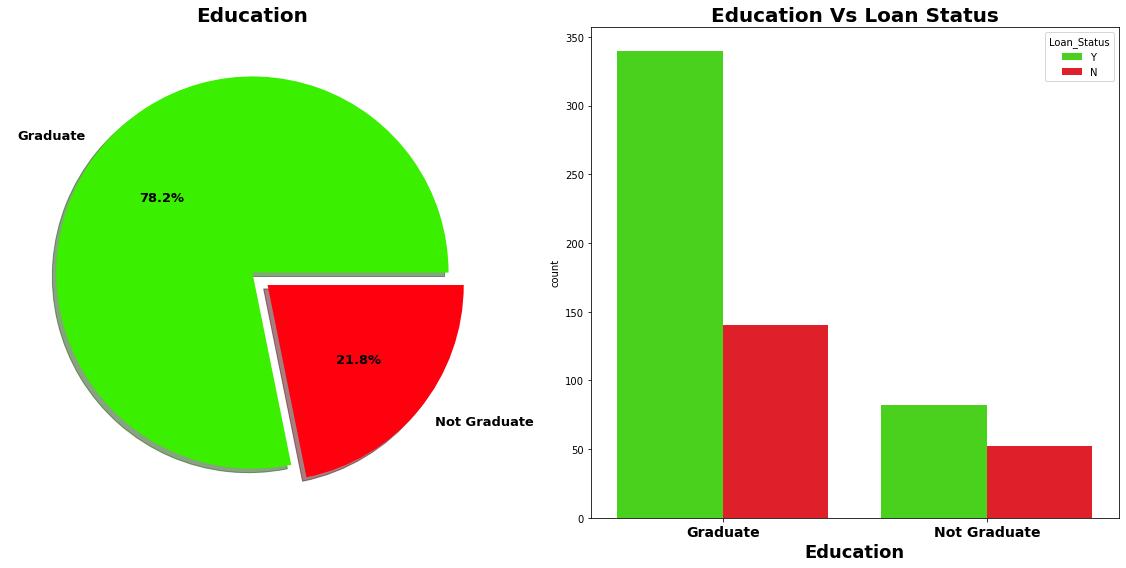

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [35]:
 pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [37]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [38]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

# 1. Outliers Detection and Removal

In [40]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

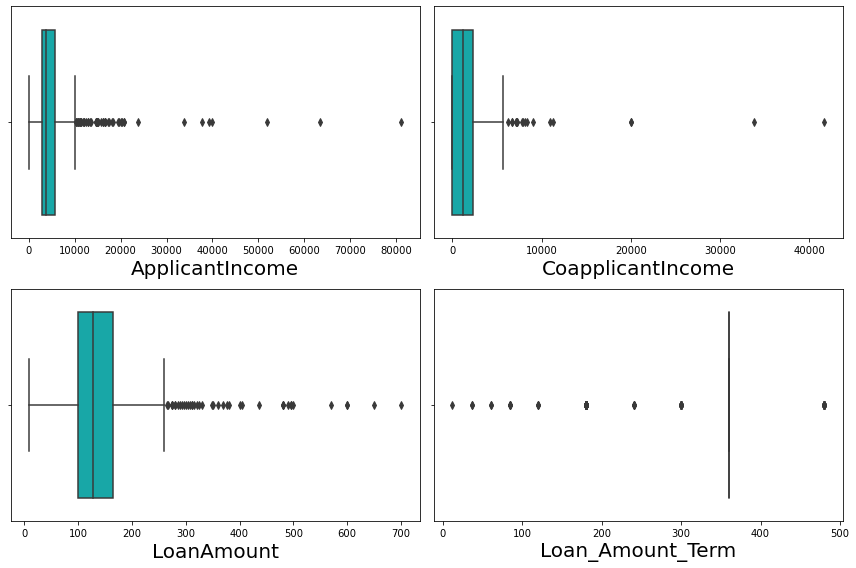

In [41]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b>From Boxplot we can see outliers exist dataset.<b>

In [42]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [43]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [44]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


<b>Data Loss<b>

In [47]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


# 2. Skewness of features

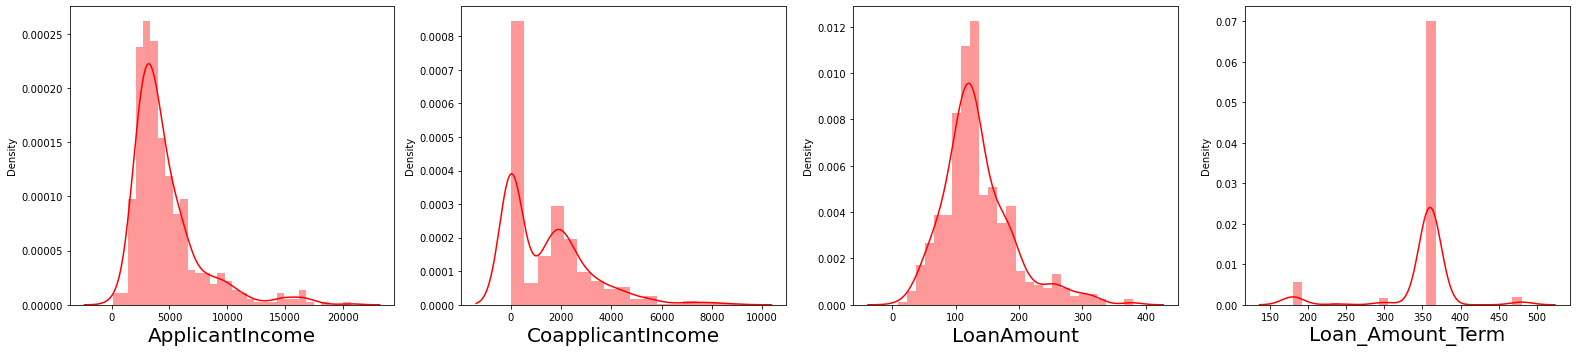

In [48]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


In [49]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [50]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [51]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


<b>Checking skewness after using yeo-johnson method<b>

In [52]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# 3. Corrleation

In [53]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


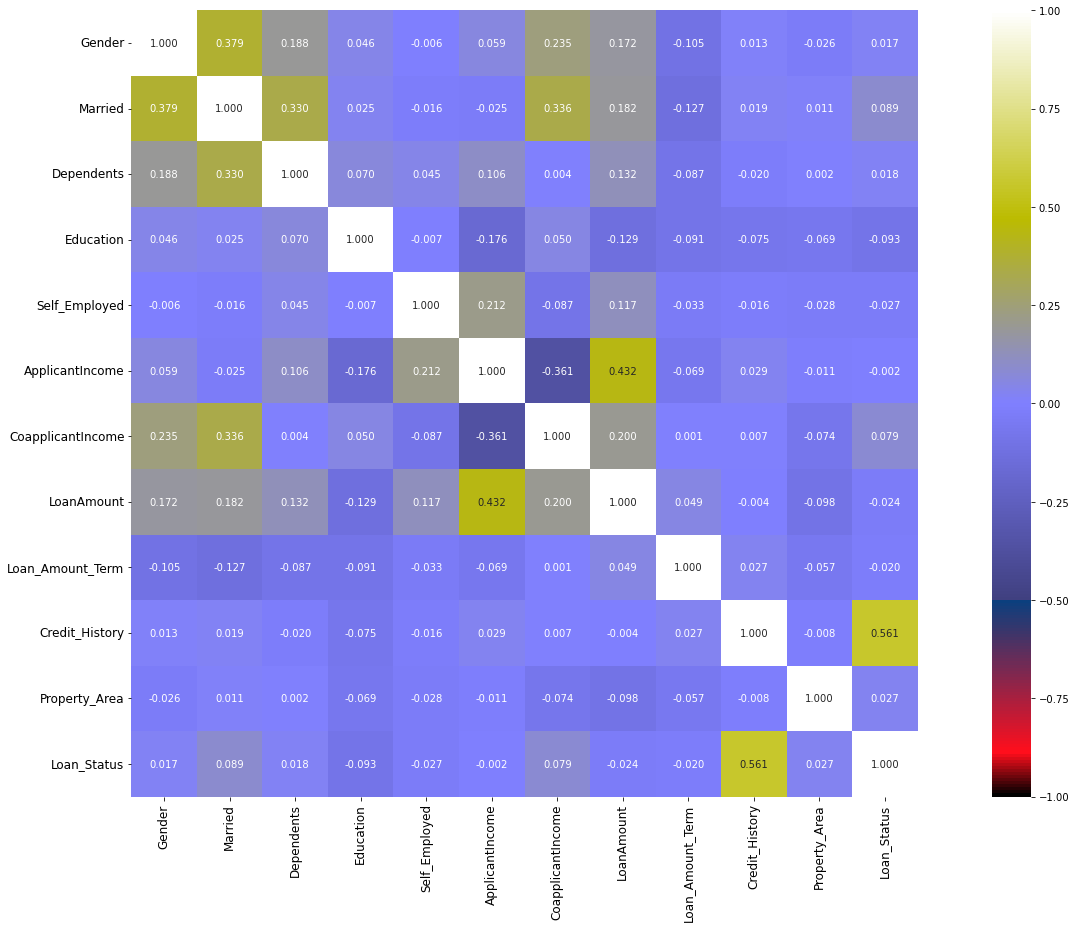

In [54]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

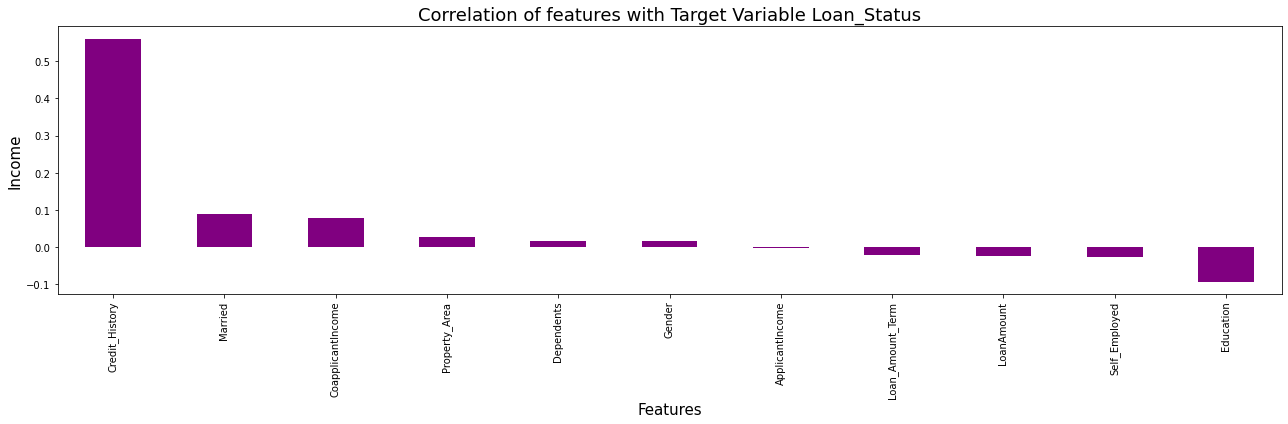

In [55]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

# 4. Checking Multicollinearity between features using variance_inflation_factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


# 5. Balanceing Imbalanced target feature

In [57]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Balancing using SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [60]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [61]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Standard Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [64]:
X_scale

array([[ 0.50744847, -1.20384001, -0.68410809, ...,  0.18123211,
         0.56791637,  1.24340042],
       [ 0.50744847,  0.83067517,  0.35510954, ...,  0.18123211,
         0.56791637, -1.25280824],
       [ 0.50744847,  0.83067517, -0.68410809, ...,  0.18123211,
         0.56791637,  1.24340042],
       ...,
       [ 0.50744847, -1.20384001, -0.68410809, ...,  0.18123211,
        -1.93435353, -1.25280824],
       [ 0.50744847,  0.83067517,  1.39432717, ...,  0.18123211,
        -0.44528309, -0.00470391],
       [ 0.50744847,  0.83067517,  0.35510954, ..., -3.13921697,
        -1.71140809, -1.25280824]])

# Machine Learning Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


# Finding best Random state

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8242677824267782 on Random_state 218


# Logistics Regression Model

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8158995815899581


Confusion matrix of Logistics Regression : 
 [[ 75  35]
 [  9 120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       110
           1       0.77      0.93      0.85       129

    accuracy                           0.82       239
   macro avg       0.83      0.81      0.81       239
weighted avg       0.83      0.82      0.81       239



# Finding Optimal value of n_neighbors for KNN

In [69]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4883581921595791
RMSE value for k=  2 is: 0.5411903817407538
RMSE value for k=  3 is: 0.4968520148758506
RMSE value for k=  4 is: 0.5601852652299533
RMSE value for k=  5 is: 0.47971400126799746
RMSE value for k=  6 is: 0.5215041008435626
RMSE value for k=  7 is: 0.4241654370544962
RMSE value for k=  8 is: 0.47091116165974684
RMSE value for k=  9 is: 0.44345543143056887
RMSE value for k=  10 is: 0.4753329597178616
RMSE value for k=  11 is: 0.4527923591472056
RMSE value for k=  12 is: 0.4664474480124446
RMSE value for k=  13 is: 0.4753329597178616
RMSE value for k=  14 is: 0.50104493321917
RMSE value for k=  15 is: 0.49262341019056577
RMSE value for k=  16 is: 0.5174769818825207
RMSE value for k=  17 is: 0.4883581921595791
RMSE value for k=  18 is: 0.4968520148758506
RMSE value for k=  19 is: 0.4840553929365547
RMSE value for k=  20 is: 0.4883581921595791
RMSE value for k=  21 is: 0.4840553929365547
RMSE value for k=  22 is: 0.4753329597178616
RMSE value for k=

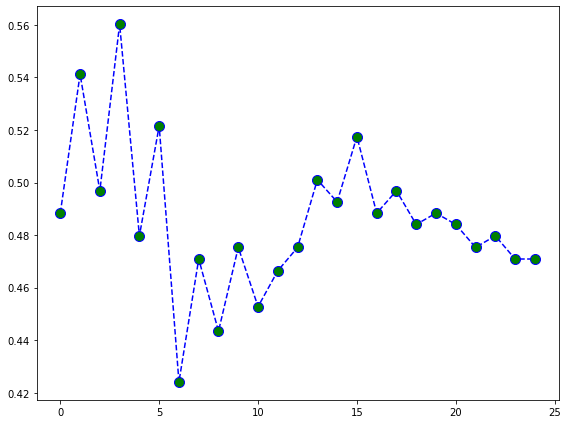

In [70]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7824267782426778


Confusion matrix : 
 [[ 73  37]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.66      0.74       110
           1       0.75      0.88      0.81       129

    accuracy                           0.78       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.78      0.78       239





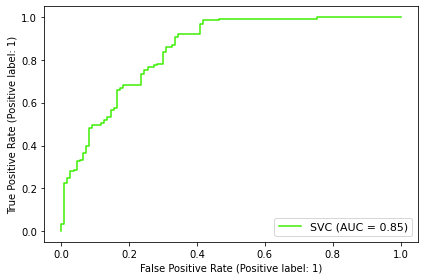

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7322175732217573


Confusion matrix : 
 [[ 62  48]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.56      0.66       110
           1       0.70      0.88      0.78       129

    accuracy                           0.73       239
   macro avg       0.75      0.72      0.72       239
weighted avg       0.74      0.73      0.72       239





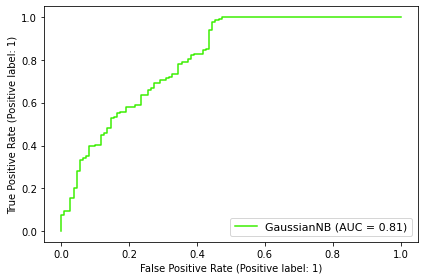

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7824267782426778


Confusion matrix : 
 [[88 22]
 [30 99]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       110
           1       0.82      0.77      0.79       129

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239





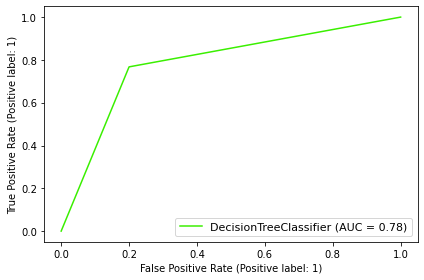

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7531380753138075


Confusion matrix : 
 [[81 29]
 [30 99]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       110
           1       0.77      0.77      0.77       129

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239





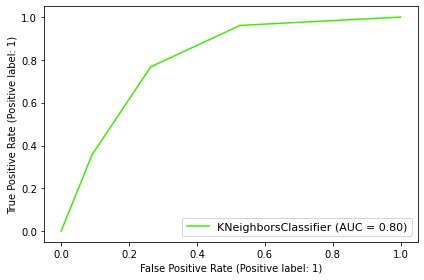

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8493723849372385


Confusion matrix : 
 [[ 91  19]
 [ 17 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.85      0.87      0.86       129

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239





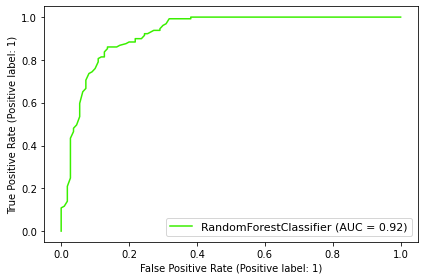

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8326359832635983


Confusion matrix : 
 [[ 90  20]
 [ 20 109]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.84      0.84      0.84       129

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





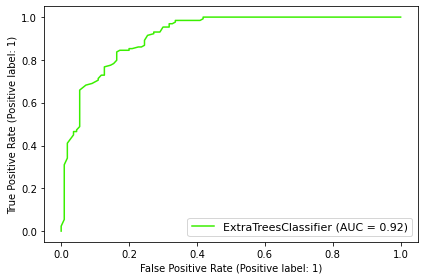

In [71]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()

# CrossValidation :

In [72]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.6875     0.67924528 0.76100629 0.81132075 0.73584906]
Mean Score : 0.7349842767295598
Std deviation : 0.048717025382932704




Cross Validation Score SVC() :

Score : [0.69375    0.71698113 0.78616352 0.80503145 0.78616352]
Mean Score : 0.7576179245283019
Std deviation : 0.04383652592419533




Cross Validation Score GaussianNB() :

Score : [0.68125    0.70440252 0.76100629 0.79874214 0.76100629]
Mean Score : 0.7412814465408805
Std deviation : 0.04252928417293401




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7125     0.76100629 0.77358491 0.76100629 0.71698113]
Mean Score : 0.7450157232704402
Std deviation : 0.025182554080604058




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.725      0.72327044 0.75471698 0.75471698 0.7672956 ]
Mean Score : 0.7450000000000001
Std deviation : 0.017652800790150008




Cross Validation Score RandomForestClassifier() :

Score : [0.75625    0.767295

# Hyper Parameter Tuning : GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.750 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.696 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.712 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [76]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

# Final Model

In [77]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8619246861924686


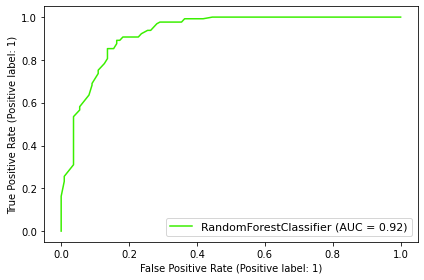

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8580338266384777


In [78]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [79]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.obj')

['Loan_Status_Final.obj']